# Basic regression: Predict fuel efficiency 

https://www.tensorflow.org/tutorials/keras/regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
#  download and import the dataset using pandas:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names = column_names, na_values = '?', 
                          comment='\t', sep=' ', skipinitialspace=True)

In [3]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [9]:
# clean data set 
# drop missing values
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
dataset = dataset.dropna()

In [11]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [12]:
# split train and test data
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [13]:
# Separate the target value, the "label", from the features. This label is the value that you will train the model to predict.
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [14]:
# normalization 
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
 1.55592356e+01 7.58980942e+01 1.78343967e-01 1.97452217e-01
 6.24203861e-01]


In [15]:
model = tf.keras.models.Sequential([
      normalizer,
      layers.Dense(64,  activation='relu'),
      layers.Dropout(0.3),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.3),
      layers.Dense(1, activation='linear')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_____________________________________________________

In [16]:
 model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.002))

In [17]:
# fit the keras model on the dataset
model.fit(train_features, train_labels, epochs=1000, batch_size=10)

Epoch 1/1000
32/32 [==============================] - 1s 1ms/step - loss: 513.7162
Epoch 2/1000
32/32 [==============================] - 0s 1ms/step - loss: 183.5645
Epoch 3/1000
32/32 [==============================] - 0s 1ms/step - loss: 48.8430
Epoch 4/1000
32/32 [==============================] - 0s 1ms/step - loss: 30.5641
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - loss: 28.6020
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 27.5665
Epoch 7/1000
32/32 [==============================] - 0s 1ms/step - loss: 30.3522
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 28.7989
Epoch 9/1000
32/32 [==============================] - 0s 1ms/step - loss: 25.5036
Epoch 10/1000
32/32 [==============================] - 0s 1ms/step - loss: 27.2914
Epoch 11/1000
32/32 [==============================] - 0s 2ms/step - loss: 27.3938
Epoch 12/1000
32/32 [==============================] - 0s 2ms/step - loss: 23.2211
Epoch 13/10

In [18]:
test_results = model.evaluate(test_features, test_labels, verbose=0)
test_results

5.136655330657959

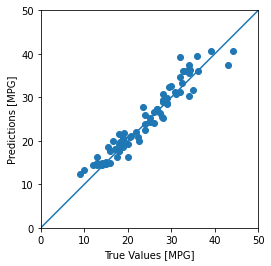

In [19]:
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)